In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import sys
sys.path.append('../..')
import tcr_embedding.utils_training as utils
import config.constants_10x as const

from tcr_embedding.models.pertubation_prediction import predict_pertubation
from tcr_embedding.evaluation.PertubationPrediction import evaluate_pertubation

### Utility Functions

In [3]:
def load_model(adata, model):
    path_model = f'saved_models/journal/Fischer_scGen/scgen_fischer_{model}.pt'
    model = utils.load_model(adata, path_model)
    return model

In [4]:
def load_covid_data():
    adata = utils.load_data('covid')
    return adata

In [5]:
adata = load_covid_data()

In [7]:
adata.obs.columns.tolist()

['batch',
 'grouping',
 'name',
 'identifier',
 'n_counts',
 'n_genes',
 'percent.mito',
 'QC_group',
 'size_factors',
 'S_score',
 'G2M_score',
 'phase',
 'louvain',
 'cell_type',
 'dcluster',
 'multi_chain',
 'TRA_1_cdr3',
 'TRA_2_cdr3',
 'TRB_1_cdr3',
 'TRB_2_cdr3',
 'TRA_1_junction_ins',
 'TRA_2_junction_ins',
 'TRB_1_junction_ins',
 'TRB_2_junction_ins',
 'TRA_1_expr',
 'TRA_2_expr',
 'TRB_1_expr',
 'TRB_2_expr',
 'TRA_1_v_gene',
 'TRA_2_v_gene',
 'TRB_1_v_gene',
 'TRB_2_v_gene',
 'TRA_1_d_gene',
 'TRA_2_d_gene',
 'TRB_1_d_gene',
 'TRB_2_d_gene',
 'TRA_1_j_gene',
 'TRA_2_j_gene',
 'TRB_1_j_gene',
 'TRB_2_j_gene',
 'TRA_1_c_gene',
 'TRA_2_c_gene',
 'TRB_1_c_gene',
 'TRB_2_c_gene',
 'TRA_1_cdr3_nt',
 'TRA_2_cdr3_nt',
 'TRB_1_cdr3_nt',
 'TRB_2_cdr3_nt',
 'has_tcr',
 'sample_rna',
 'sample_tcr',
 'clonotype_cellranger',
 'concatenation',
 'patient',
 'condition',
 'mt_frac',
 'CD3_all_genes',
 'leiden',
 'chain_pairing',
 'leiden_corrected',
 'CD8_all_genes',
 'CD4_states',
 'CD8_stat

In [13]:
adata.obs.groupby()['identifier'].value_counts()

Sample_20063a009_01    3703
Sample_20063a010_01    3010
Name: identifier, dtype: int64

In [17]:
adata.obs['condition'].value_counts()

unstimulated    3703
stimulated      3010
Name: condition, dtype: int64

## Fischer Dataset

In [5]:
data = load_covid_data()

In [6]:
top_10_cts = [6, 12, 9, 46, 31, 4, 64, 72, 19, 81]

In [7]:
reactive_cts = [46, 81, 175, 138, 13, 60, 90, 146, 327]

In [8]:
all_cts = top_10_cts + reactive_cts

## UMAPS

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

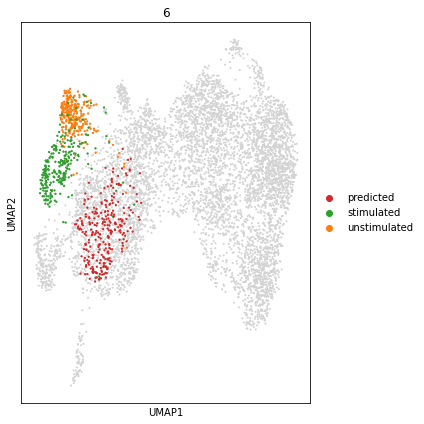

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

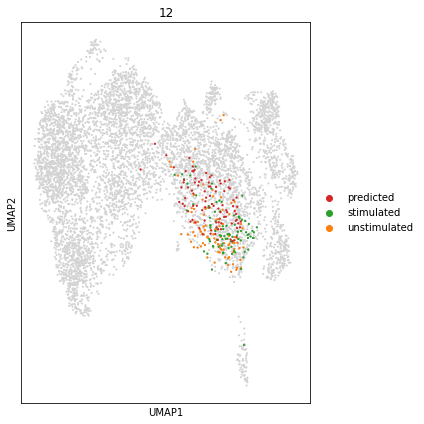

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

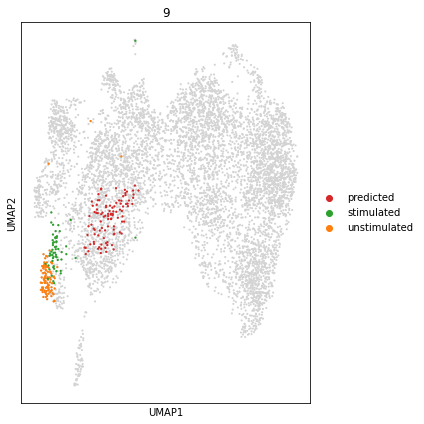

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

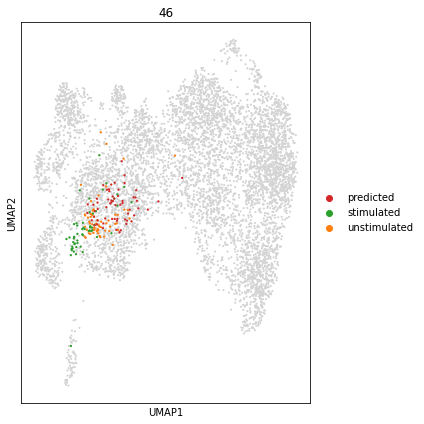

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

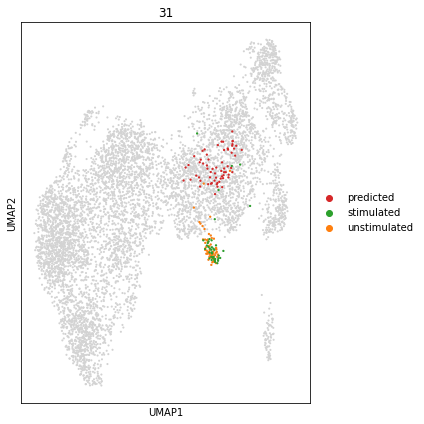

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

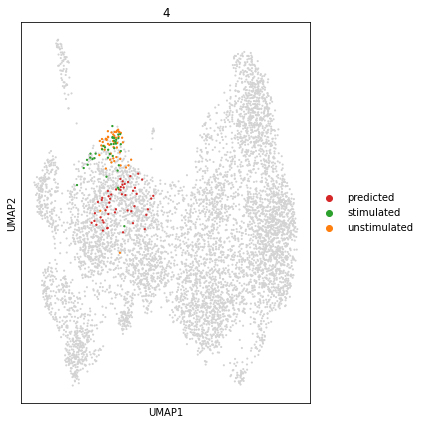

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

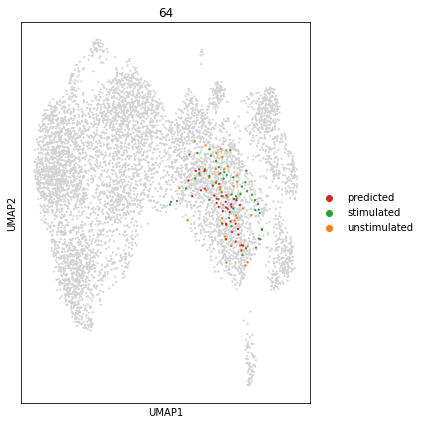

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

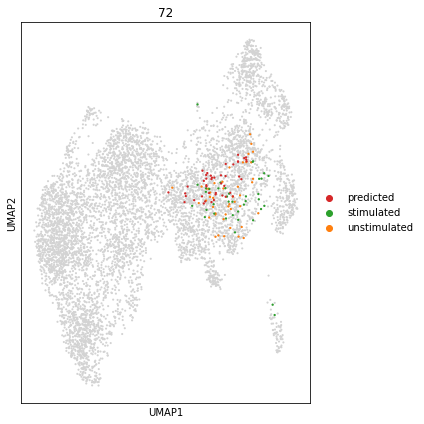

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

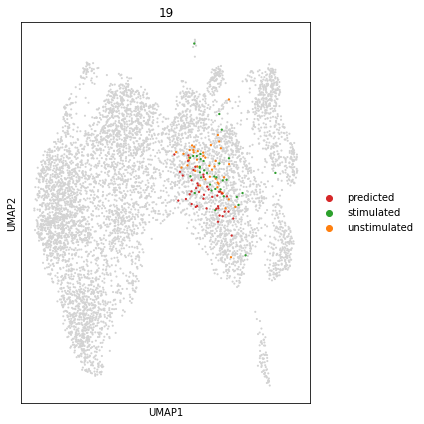

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

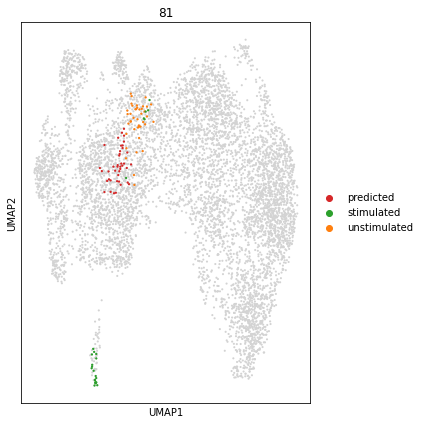

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

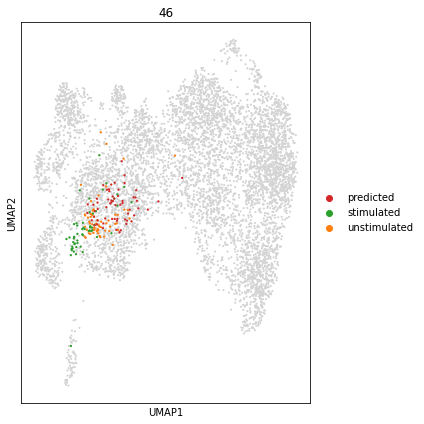

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

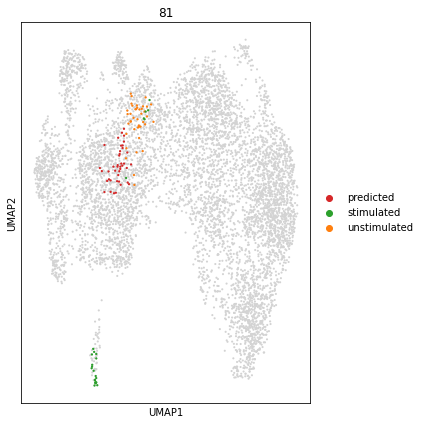

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

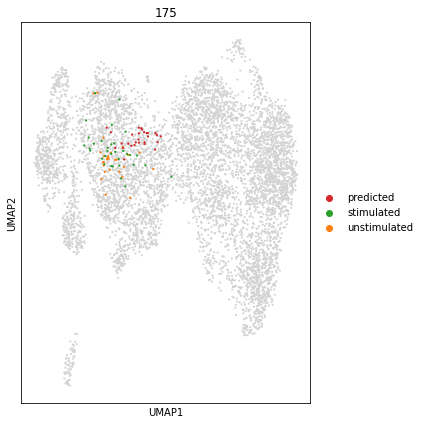

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

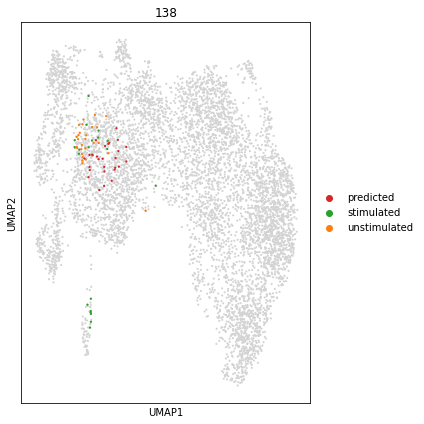

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

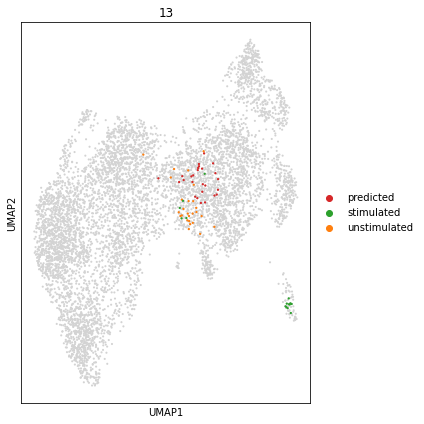

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

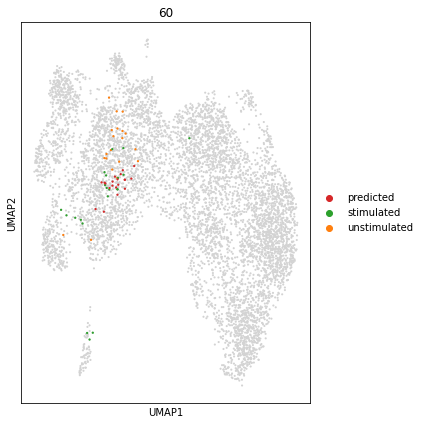

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

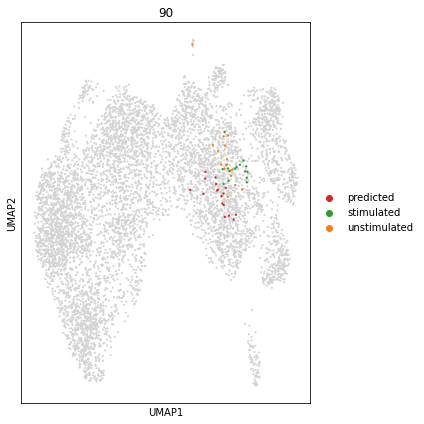

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

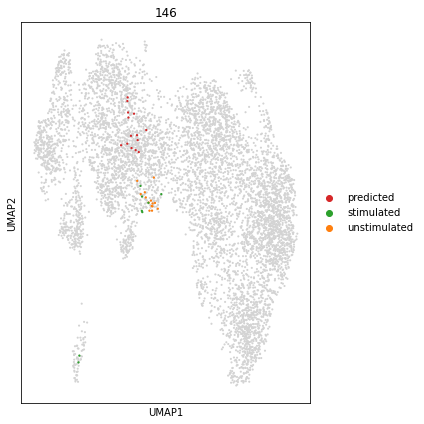

... storing 'grouping' as categorical
... storing 'name' as categorical
... storing 'identifier' as categorical
... storing 'QC_group' as categorical
... storing 'phase' as categorical
... storing 'louvain' as categorical
... storing 'cell_type' as categorical
... storing 'dcluster' as categorical
... storing 'multi_chain' as categorical
... storing 'TRA_1_cdr3' as categorical
... storing 'TRA_2_cdr3' as categorical
... storing 'TRB_1_cdr3' as categorical
... storing 'TRB_2_cdr3' as categorical
... storing 'TRA_1_v_gene' as categorical
... storing 'TRA_2_v_gene' as categorical
... storing 'TRB_1_v_gene' as categorical
... storing 'TRB_2_v_gene' as categorical
... storing 'TRA_1_d_gene' as categorical
... storing 'TRA_2_d_gene' as categorical
... storing 'TRB_1_d_gene' as categorical
... storing 'TRB_2_d_gene' as categorical
... storing 'TRA_1_j_gene' as categorical
... storing 'TRA_2_j_gene' as categorical
... storing 'TRB_1_j_gene' as categorical
... storing 'TRB_2_j_gene' as categori

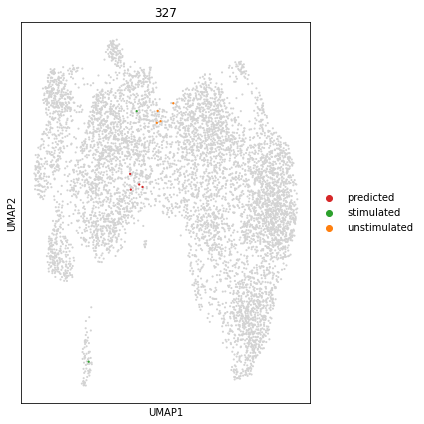

In [9]:
data = load_covid_data()
sc.pp.neighbors(data)
sc.tl.umap(data)


for ct in all_cts:
    data_tmp = data.copy()

    model = load_model(data_tmp, 'moe')
    latent = model.get_latent(data_tmp, metadata=['condition', 'clonotype'])

    mask_val = latent.obs['clonotype']==ct

    latent_train = latent[~mask_val]
    latent_val = latent[mask_val]
    latent_val_pre = latent_val[latent_val.obs['condition']=='unstimulated']

    ad_pred = predict_pertubation(latent_train, latent_val_pre, model, 'condition', 'unstimulated', 
                                  var_names=data_tmp.var_names, col_type='clonotype')   
    ad_pred.obs['condition'] = 'predicted'
    ad_pred.var_names = data.var_names
    
    #ad_recon = model.predict_rna_from_latent(latent, metadata=latent.obs.columns)
    #ad_recon.var_names = data.var_names
    ad_joint = data_tmp.concatenate(ad_pred)
      
    sc.pp.neighbors(ad_joint)
    sc.tl.umap(ad_joint)
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    #sc.pl.umap(ad_joint, color='treatment', ax=ax[0][0], show=False)
    #sc.pl.umap(ad_joint, color='cluster', ax=ax[0][1], show=False)
    
    sc.pl.umap(ad_joint, ax=ax, show=False)
    sc.pl.umap(ad_joint[ad_joint.obs['clonotype']==ct], color='condition', ax=ax, show=False, size=20, 
               title=str(ct), palette={'unstimulated': 'tab:orange',
                                       'stimulated': 'tab:green',
                                       'predicted': 'tab:red',
                                      })
    
    
    
    #sc.pl.umap(data, color='treatment', ax=ax[1][0], show=False)
    #sc.pl.umap(data, color='cluster', ax=ax[1][1], show=False)
    
    #sc.pl.umap(data, ax=ax[1][2], show=False)
    #sc.pl.umap(data[data.obs['clonotype']==ct], color='treatment', ax=ax[1][2], show=False, size=20)
    
    fig.tight_layout()
    plt.show()

## Metrics

In [13]:
data = load_covid_data()

model_names = []
metrics = []
clono_types = []
scores = []


for ct in all_cts:
    for model_name in ['rna', 'moe']:
        data_tmp = data.copy()
        model = load_model(data_tmp, model_name)
        latent = model.get_latent(data_tmp, metadata=['condition', 'clonotype'])
        
        mask_val = latent.obs['clonotype']==ct
        
        latent_train = latent[~mask_val]
        latent_val = latent[mask_val]
        latent_val_pre = latent_val[latent_val.obs['condition']=='unstimulated']
        
        ad_pred = predict_pertubation(latent_train, latent_val_pre, model, 'condition', 'unstimulated', 
                                            var_names=data_tmp.var_names, col_type='clonotype')   
        
        ad_pred.obs['source'] = 'predicted'
        ad_pred.var_names = data.var_names

        data_ct = data_tmp[data_tmp.obs['clonotype']==ct]
        sc.tl.rank_genes_groups(data_ct, 'condition', n_genes=50, method='wilcoxon')
        degs = data_ct.uns['rank_genes_groups']['names']
        degs = [gene for group in degs for gene in group]

        summary = evaluate_pertubation(data_ct, ad_pred, 'clonotype',
                                     'condition', indicator='unstimulated', gene_set=degs)
        
        model_names += [model_name] * 2
        clono_types += [ct] * 2
        metrics += ['R_squared', 'R_squared_top100'] 
        scores += [summary['all_genes']['r_squared'], summary['degs']['r_squared']]

  
    # Add Pre Cells as prediction to Eval
    data_ct = data_tmp[data_tmp.obs['clonotype']==ct]
   
    sc.tl.rank_genes_groups(data_ct, 'condition', n_genes=50, method='wilcoxon')  
    degs = data_ct.uns['rank_genes_groups']['names']
    degs = [gene for group in degs for gene in group]
    
    ad_pred = data_tmp[(data_tmp.obs['clonotype']==ct) & (data_tmp.obs['condition']=='unstimulated')]
    summary = evaluate_pertubation(data_ct, ad_pred, 'clonotype',
                                     'condition', indicator='unstimulated', gene_set=degs)
    model_names += ['pre'] * 2
    clono_types += [ct] * 2
    metrics += ['R_squared', 'R_squared_top100'] 
    scores += [summary['all_genes']['r_squared'], summary['degs']['r_squared']]

        
    
results_bcc = {
    'model': model_names,
    'metric': metrics,
    'clonotype': clono_types,
    'score': scores,
}
results_bcc = pd.DataFrame(results_bcc)
results_bcc.to_csv('results/performance_bcc_clonotype.csv')
results_bcc

Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9710139693723059, 'b': -0.004778487785173688, 'r_value': 0.9819402776687425, 'p_value': 0.0, 'std_err': 0.0026463244763630473, 'r_squared': 0.9642067089081671}, 'per_clonotype': {6: {'m': 0.9710139693723059, 'b': -0.004778487785173688, 'r_value': 0.9819402776687425, 'p_value': 0.0, 'std_err': 0.0026463244763630473, 'r_squared': 0.9642067089081671}}, 'degs': {'m': 1.0143102803397521, 'b': -0.05148516990546104, 'r_value': 0.969808873540573, 'p_value': 7.229790963007763e-62, 'std_err': 0.025764596138364477, 'r_squared': 0.9405292511980351}, 'per_clonotype_degs': {6: {'m': 1.0143103630567814, 'b': -0.05148521727308808, 'r_value': 0.9698088885884664, 'p_value': 7.229616991014228e-62, 'std_err': 0.025764591517296802, 'r_squared': 0.9405292803851963}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9710139693723059, 'b': -0.004778487785173688, 'r_value': 0.9819402776687425, 'p_value': 0.0, 'std_err': 0.0026463244763630473, 'r_squared': 0.9642067089081671}, 'per_clonotype': {6: {'m': 0.9710139693723059, 'b': -0.004778487785173688, 'r_value': 0.9819402776687425, 'p_value': 0.0, 'std_err': 0.0026463244763630473, 'r_squared': 0.9642067089081671}}, 'degs': {'m': 1.0143102803397521, 'b': -0.05148516990546104, 'r_value': 0.969808873540573, 'p_value': 7.229790963007763e-62, 'std_err': 0.025764596138364477, 'r_squared': 0.9405292511980351}, 'per_clonotype_degs': {6: {'m': 1.0143103630567814, 'b': -0.05148521727308808, 'r_value': 0.9698088885884664, 'p_value': 7.229616991014228e-62, 'std_err': 0.025764591517296802, 'r_squared': 0.9405292803851963}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.972346839478413, 'b': -0.0007931214138671636, 'r_value': 0.9768441876806758, 'p_value': 0.0, 'std_err': 0.0030124095432864546, 'r_squared': 0.9542245670055194}, 'per_clonotype': {6: {'m': 0.972346839478413, 'b': -0.0007931214138671636, 'r_value': 0.9768441876806758, 'p_value': 0.0, 'std_err': 0.0030124095432864546, 'r_squared': 0.9542245670055194}}, 'degs': {'m': 0.9555767177309611, 'b': -0.028652909228558454, 'r_value': 0.928392565972228, 'p_value': 6.372632265284189e-44, 'std_err': 0.03863648844314498, 'r_squared': 0.8619127565524977}, 'per_clonotype_degs': {6: {'m': 0.9555767177309611, 'b': -0.028652909228558454, 'r_value': 0.928392565972228, 'p_value': 6.372632265284189e-44, 'std_err': 0.03863648844314498, 'r_squared': 0.8619127565524977}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9586568912941702, 'b': 0.003715819746256774, 'r_value': 0.9863336440434665, 'p_value': 0.0, 'std_err': 0.0022651329041227216, 'r_squared': 0.9728540573720637}, 'per_clonotype': {12: {'m': 0.9586568912941702, 'b': 0.003715819746256774, 'r_value': 0.9863336440434665, 'p_value': 0.0, 'std_err': 0.0022651329041227216, 'r_squared': 0.9728540573720637}}, 'degs': {'m': 0.8984128334449529, 'b': 0.025367305568416543, 'r_value': 0.9797048153343532, 'p_value': 3.233115242722952e-70, 'std_err': 0.018567968466157856, 'r_squared': 0.9598215251893191}, 'per_clonotype_degs': {12: {'m': 0.8984127826674123, 'b': 0.0253673224725936, 'r_value': 0.9797048163989478, 'p_value': 3.233107014341735e-70, 'std_err': 0.018567966914531216, 'r_squared': 0.959821527275296}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9784467515963348, 'b': 0.001596586169708411, 'r_value': 0.9881487358246169, 'p_value': 0.0, 'std_err': 0.0021499260684977872, 'r_squared': 0.9764379241117885}, 'per_clonotype': {12: {'m': 0.9784467515963348, 'b': 0.001596586169708411, 'r_value': 0.9881487358246169, 'p_value': 0.0, 'std_err': 0.0021499260684977872, 'r_squared': 0.9764379241117885}}, 'degs': {'m': 0.880416861705959, 'b': 0.013800512852231883, 'r_value': 0.9318513009572141, 'p_value': 6.128419050133605e-45, 'std_err': 0.034629349215088666, 'r_squared': 0.8683468470956525}, 'per_clonotype_degs': {12: {'m': 0.880416861705959, 'b': 0.013800512852231883, 'r_value': 0.9318513009572141, 'p_value': 6.128419050133605e-45, 'std_err': 0.034629349215088666, 'r_squared': 0.8683468470956525}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9496173191399534, 'b': 0.002609088074795138, 'r_value': 0.9748481110685658, 'p_value': 0.0, 'std_err': 0.0030709001740057214, 'r_squared': 0.9503288396539509}, 'per_clonotype': {9: {'m': 0.9496173191399534, 'b': 0.002609088074795138, 'r_value': 0.9748481110685658, 'p_value': 0.0, 'std_err': 0.0030709001740057214, 'r_squared': 0.9503288396539509}}, 'degs': {'m': 0.9630949962290003, 'b': -0.0049472149094857976, 'r_value': 0.9743138253203072, 'p_value': 2.9305820048237496e-65, 'std_err': 0.0224861463375822, 'r_squared': 0.94928743021029}, 'per_clonotype_degs': {9: {'m': 0.9630950624897284, 'b': -0.00494724459856033, 'r_value': 0.9743138280928543, 'p_value': 2.9305666984355997e-65, 'std_err': 0.02248614662285617, 'r_squared': 0.949287435612952}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9697451682510908, 'b': 0.0003081142694950634, 'r_value': 0.978266469147469, 'p_value': 0.0, 'std_err': 0.0029074340310662624, 'r_squared': 0.9570052846582559}, 'per_clonotype': {9: {'m': 0.9697451682510908, 'b': 0.0003081142694950634, 'r_value': 0.978266469147469, 'p_value': 0.0, 'std_err': 0.0029074340310662624, 'r_squared': 0.9570052846582559}}, 'degs': {'m': 0.903802871495701, 'b': -0.009135805077465697, 'r_value': 0.9083119741328172, 'p_value': 7.099138831368846e-39, 'std_err': 0.04204425275172132, 'r_squared': 0.8250306423530556}, 'per_clonotype_degs': {9: {'m': 0.903802871495701, 'b': -0.009135805077465697, 'r_value': 0.9083119741328172, 'p_value': 7.099138831368846e-39, 'std_err': 0.04204425275172132, 'r_squared': 0.8250306423530556}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.964664825494505, 'b': 0.0025928598078254067, 'r_value': 0.9902576154707858, 'p_value': 0.0, 'std_err': 0.0019187456445459378, 'r_squared': 0.9806101449978868}, 'per_clonotype': {46: {'m': 0.964664825494505, 'b': 0.0025928598078254067, 'r_value': 0.9902576154707858, 'p_value': 0.0, 'std_err': 0.0019187456445459378, 'r_squared': 0.9806101449978868}}, 'degs': {'m': 0.9877922868995541, 'b': -0.006226445483568599, 'r_value': 0.9895273795285768, 'p_value': 3.397488075616649e-84, 'std_err': 0.014555509769205976, 'r_squared': 0.9791644348366921}, 'per_clonotype_degs': {46: {'m': 0.9877923199045031, 'b': -0.006226429814339407, 'r_value': 0.989527376455958, 'p_value': 3.3975366727489127e-84, 'std_err': 0.014555512424763904, 'r_squared': 0.9791644287558112}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9688508276267891, 'b': 0.0011689029152725725, 'r_value': 0.9786551970920233, 'p_value': 0.0, 'std_err': 0.0028777974041369783, 'r_squared': 0.957765994795227}, 'per_clonotype': {46: {'m': 0.9688508276267891, 'b': 0.0011689029152725725, 'r_value': 0.9786551970920233, 'p_value': 0.0, 'std_err': 0.0028777974041369783, 'r_squared': 0.957765994795227}}, 'degs': {'m': 0.8908618897894286, 'b': -0.005563565698496975, 'r_value': 0.9141715089394311, 'p_value': 3.2236336884951825e-40, 'std_err': 0.03990026897836273, 'r_squared': 0.8357095477565963}, 'per_clonotype_degs': {46: {'m': 0.8908618897894286, 'b': -0.005563565698496975, 'r_value': 0.9141715089394311, 'p_value': 3.2236336884951825e-40, 'std_err': 0.03990026897836273, 'r_squared': 0.8357095477565963}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 1.012138148958133, 'b': 1.0177375908117237e-05, 'r_value': 0.9922352790048995, 'p_value': 0.0, 'std_err': 0.0017945693452525978, 'r_squared': 0.9845308489019308}, 'per_clonotype': {31: {'m': 1.012138148958133, 'b': 1.0177375908117237e-05, 'r_value': 0.9922352790048995, 'p_value': 0.0, 'std_err': 0.0017945693452525978, 'r_squared': 0.9845308489019308}}, 'degs': {'m': 1.0363002953419855, 'b': -0.00684949295316456, 'r_value': 0.9934134958081411, 'p_value': 5.039614338535141e-94, 'std_err': 0.012074487652892027, 'r_squared': 0.9868703736537515}, 'per_clonotype_degs': {31: {'m': 1.0363002414771356, 'b': -0.006849503888005037, 'r_value': 0.9934134929994706, 'p_value': 5.039719308258955e-94, 'std_err': 0.01207448962536577, 'r_squared': 0.9868703680734091}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9922618205043889, 'b': -0.00013017556919366763, 'r_value': 0.9905163536637116, 'p_value': 0.0, 'std_err': 0.001946870457590984, 'r_squared': 0.981122646875255}, 'per_clonotype': {31: {'m': 0.9922618205043889, 'b': -0.00013017556919366763, 'r_value': 0.9905163536637116, 'p_value': 0.0, 'std_err': 0.001946870457590984, 'r_squared': 0.981122646875255}}, 'degs': {'m': 1.011333642162779, 'b': -0.01225007338582712, 'r_value': 0.9723732897027483, 'p_value': 9.925038832807576e-64, 'std_err': 0.02452491658731216, 'r_squared': 0.9455098145273448}, 'per_clonotype_degs': {31: {'m': 1.011333642162779, 'b': -0.01225007338582712, 'r_value': 0.9723732897027483, 'p_value': 9.925038832807576e-64, 'std_err': 0.02452491658731216, 'r_squared': 0.9455098145273448}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 1.007189287071977, 'b': -0.002514481151259261, 'r_value': 0.9925239939789084, 'p_value': 0.0, 'std_err': 0.001751896958123177, 'r_squared': 0.9851038786238443}, 'per_clonotype': {4: {'m': 1.007189287071977, 'b': -0.002514481151259261, 'r_value': 0.9925239939789084, 'p_value': 0.0, 'std_err': 0.001751896958123177, 'r_squared': 0.9851038786238443}}, 'degs': {'m': 1.0288737367707625, 'b': -0.013754893581492733, 'r_value': 0.9871613242731684, 'p_value': 6.944353536280067e-80, 'std_err': 0.016816576590524913, 'r_squared': 0.9744874801407555}, 'per_clonotype_degs': {4: {'m': 1.0288737073920367, 'b': -0.013754881941504926, 'r_value': 0.9871613318668887, 'p_value': 6.944153524868492e-80, 'std_err': 0.016816571039840515, 'r_squared': 0.9744874951332095}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9851549741771883, 'b': -0.0008306390258659493, 'r_value': 0.9874066160633086, 'p_value': 0.0, 'std_err': 0.0022326722952771085, 'r_squared': 0.9749718254455941}, 'per_clonotype': {4: {'m': 0.9851549741771883, 'b': -0.0008306390258659493, 'r_value': 0.9874066160633086, 'p_value': 0.0, 'std_err': 0.0022326722952771085, 'r_squared': 0.9749718254455941}}, 'degs': {'m': 0.957455209788719, 'b': -0.007020104081325584, 'r_value': 0.9570568879980315, 'p_value': 1.675849541205219e-54, 'std_err': 0.029296528215938585, 'r_squared': 0.9159578868644765}, 'per_clonotype_degs': {4: {'m': 0.957455209788719, 'b': -0.007020104081325584, 'r_value': 0.9570568879980315, 'p_value': 1.675849541205219e-54, 'std_err': 0.029296528215938585, 'r_squared': 0.9159578868644765}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.964941997528789, 'b': 0.0019039378200352286, 'r_value': 0.9891892894959683, 'p_value': 0.0, 'std_err': 0.0020234331111491995, 'r_squared': 0.9784954504535386}, 'per_clonotype': {64: {'m': 0.964941997528789, 'b': 0.0019039378200352286, 'r_value': 0.9891892894959683, 'p_value': 0.0, 'std_err': 0.0020234331111491995, 'r_squared': 0.9784954504535386}}, 'degs': {'m': 0.8781180473657098, 'b': 0.00645799063051028, 'r_value': 0.9538604296586728, 'p_value': 5.232293915651361e-53, 'std_err': 0.027921488968920893, 'r_squared': 0.9098497192686279}, 'per_clonotype_degs': {64: {'m': 0.8781180145139538, 'b': 0.0064580013874450115, 'r_value': 0.953860440194825, 'p_value': 5.23223669603496e-53, 'std_err': 0.027921484503211712, 'r_squared': 0.9098497393686652}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9720037230355089, 'b': 0.0010730955240947498, 'r_value': 0.9853429867346933, 'p_value': 0.0, 'std_err': 0.0023802517118749113, 'r_squared': 0.970900801507246}, 'per_clonotype': {64: {'m': 0.9720037230355089, 'b': 0.0010730955240947498, 'r_value': 0.9853429867346933, 'p_value': 0.0, 'std_err': 0.0023802517118749113, 'r_squared': 0.970900801507246}}, 'degs': {'m': 0.8600297870077238, 'b': 0.02232760934859429, 'r_value': 0.9154751062071083, 'p_value': 1.572293792962731e-40, 'std_err': 0.038184269712480005, 'r_squared': 0.8380946700849161}, 'per_clonotype_degs': {64: {'m': 0.8600297870077238, 'b': 0.02232760934859429, 'r_value': 0.9154751062071083, 'p_value': 1.572293792962731e-40, 'std_err': 0.038184269712480005, 'r_squared': 0.8380946700849161}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9840562388547688, 'b': 0.001199261748428812, 'r_value': 0.9860894187348285, 'p_value': 0.0, 'std_err': 0.002346267539767416, 'r_squared': 0.9723723417407919}, 'per_clonotype': {72: {'m': 0.9840562388547688, 'b': 0.001199261748428812, 'r_value': 0.9860894187348285, 'p_value': 0.0, 'std_err': 0.002346267539767416, 'r_squared': 0.9723723417407919}}, 'degs': {'m': 0.9954050032676361, 'b': -0.0014685929892582217, 'r_value': 0.9865271276947422, 'p_value': 7.263915027211147e-79, 'std_err': 0.016674587393804723, 'r_squared': 0.9732357736776381}, 'per_clonotype_degs': {72: {'m': 0.9954049388413277, 'b': -0.001468630944626459, 'r_value': 0.9865271257935205, 'p_value': 7.263964927691675e-79, 'std_err': 0.01667458751523466, 'r_squared': 0.9732357699264247}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9821443458075223, 'b': 0.0007908210656322953, 'r_value': 0.9822808587012543, 'p_value': 0.0, 'std_err': 0.0026506076252971757, 'r_squared': 0.9648756853708734}, 'per_clonotype': {72: {'m': 0.9821443458075223, 'b': 0.0007908210656322953, 'r_value': 0.9822808587012543, 'p_value': 0.0, 'std_err': 0.0026506076252971757, 'r_squared': 0.9648756853708734}}, 'degs': {'m': 0.9348590460571837, 'b': 0.0016995684814195, 'r_value': 0.9192865341732755, 'p_value': 1.799618692360033e-41, 'std_err': 0.04043198883564699, 'r_squared': 0.8450877319123129}, 'per_clonotype_degs': {72: {'m': 0.9348590460571837, 'b': 0.0016995684814195, 'r_value': 0.9192865341732755, 'p_value': 1.799618692360033e-41, 'std_err': 0.04043198883564699, 'r_squared': 0.8450877319123129}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9713022206520433, 'b': 0.002637898186640293, 'r_value': 0.9872240075920214, 'p_value': 0.0, 'std_err': 0.0022174880228093123, 'r_squared': 0.9746112411660516}, 'per_clonotype': {19: {'m': 0.9713022206520433, 'b': 0.002637898186640293, 'r_value': 0.9872240075920214, 'p_value': 0.0, 'std_err': 0.0022174880228093123, 'r_squared': 0.9746112411660516}}, 'degs': {'m': 1.003871422368998, 'b': 0.015555324594716757, 'r_value': 0.978837413177844, 'p_value': 2.4619735852013715e-69, 'std_err': 0.0212003936759676, 'r_squared': 0.9581226814366933}, 'per_clonotype_degs': {19: {'m': 1.0038714212272708, 'b': 0.015555324965455697, 'r_value': 0.9788374142721051, 'p_value': 2.4619674114204575e-69, 'std_err': 0.02120039308590926, 'r_squared': 0.9581226835789007}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9857615145994125, 'b': 0.0003636279328623204, 'r_value': 0.9880390985762949, 'p_value': 0.0, 'std_err': 0.0021761760097583913, 'r_squared': 0.9762212603154574}, 'per_clonotype': {19: {'m': 0.9857615145994125, 'b': 0.0003636279328623204, 'r_value': 0.9880390985762949, 'p_value': 0.0, 'std_err': 0.0021761760097583913, 'r_squared': 0.9762212603154574}}, 'degs': {'m': 0.9242534064315688, 'b': 0.0067165008631066, 'r_value': 0.9478687362138006, 'p_value': 1.7956452237727993e-50, 'std_err': 0.03138764942395116, 'r_squared': 0.8984551410915476}, 'per_clonotype_degs': {19: {'m': 0.9242534064315688, 'b': 0.0067165008631066, 'r_value': 0.9478687362138006, 'p_value': 1.7956452237727993e-50, 'std_err': 0.03138764942395116, 'r_squared': 0.8984551410915476}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9590822749187354, 'b': 0.0036424418792153287, 'r_value': 0.9717431474027045, 'p_value': 0.0, 'std_err': 0.0032952875325996745, 'r_squared': 0.9442847445241143}, 'per_clonotype': {81: {'m': 0.9590822749187354, 'b': 0.0036424418792153287, 'r_value': 0.9717431474027045, 'p_value': 0.0, 'std_err': 0.0032952875325996745, 'r_squared': 0.9442847445241143}}, 'degs': {'m': 0.8990341209810394, 'b': 0.019981097576460494, 'r_value': 0.9404318478195423, 'p_value': 1.0328556185423424e-47, 'std_err': 0.0328316016668036, 'r_squared': 0.8844120603932787}, 'per_clonotype_degs': {81: {'m': 0.899034071112841, 'b': 0.01998107328963794, 'r_value': 0.9404318432998695, 'p_value': 1.0328593454965045e-47, 'std_err': 0.03283160121076274, 'r_squared': 0.8844120518923904}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.8469739540422895, 'b': 0.008299831263381768, 'r_value': 0.8462254360935576, 'p_value': 0.0, 'std_err': 0.007543457902872634, 'r_squared': 0.7160974886917317}, 'per_clonotype': {81: {'m': 0.8469739540422895, 'b': 0.008299831263381768, 'r_value': 0.8462254360935576, 'p_value': 0.0, 'std_err': 0.007543457902872634, 'r_squared': 0.7160974886917317}}, 'degs': {'m': 0.6008838486178542, 'b': 0.13840696195251223, 'r_value': 0.5532616175824596, 'p_value': 2.379761727375083e-09, 'std_err': 0.09138941336459455, 'r_squared': 0.3060984174899598}, 'per_clonotype_degs': {81: {'m': 0.6008838486178542, 'b': 0.13840696195251223, 'r_value': 0.5532616175824596, 'p_value': 2.379761727375083e-09, 'std_err': 0.09138941336459455, 'r_squared': 0.3060984174899598}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.964664825494505, 'b': 0.0025928598078254067, 'r_value': 0.9902576154707858, 'p_value': 0.0, 'std_err': 0.0019187456445459378, 'r_squared': 0.9806101449978868}, 'per_clonotype': {46: {'m': 0.964664825494505, 'b': 0.0025928598078254067, 'r_value': 0.9902576154707858, 'p_value': 0.0, 'std_err': 0.0019187456445459378, 'r_squared': 0.9806101449978868}}, 'degs': {'m': 0.9877922868995541, 'b': -0.006226445483568599, 'r_value': 0.9895273795285768, 'p_value': 3.397488075616649e-84, 'std_err': 0.014555509769205976, 'r_squared': 0.9791644348366921}, 'per_clonotype_degs': {46: {'m': 0.9877923199045031, 'b': -0.006226429814339407, 'r_value': 0.989527376455958, 'p_value': 3.3975366727489127e-84, 'std_err': 0.014555512424763904, 'r_squared': 0.9791644287558112}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9688508276267891, 'b': 0.0011689029152725725, 'r_value': 0.9786551970920233, 'p_value': 0.0, 'std_err': 0.0028777974041369783, 'r_squared': 0.957765994795227}, 'per_clonotype': {46: {'m': 0.9688508276267891, 'b': 0.0011689029152725725, 'r_value': 0.9786551970920233, 'p_value': 0.0, 'std_err': 0.0028777974041369783, 'r_squared': 0.957765994795227}}, 'degs': {'m': 0.8908618897894286, 'b': -0.005563565698496975, 'r_value': 0.9141715089394311, 'p_value': 3.2236336884951825e-40, 'std_err': 0.03990026897836273, 'r_squared': 0.8357095477565963}, 'per_clonotype_degs': {46: {'m': 0.8908618897894286, 'b': -0.005563565698496975, 'r_value': 0.9141715089394311, 'p_value': 3.2236336884951825e-40, 'std_err': 0.03990026897836273, 'r_squared': 0.8357095477565963}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9590822749187354, 'b': 0.0036424418792153287, 'r_value': 0.9717431474027045, 'p_value': 0.0, 'std_err': 0.0032952875325996745, 'r_squared': 0.9442847445241143}, 'per_clonotype': {81: {'m': 0.9590822749187354, 'b': 0.0036424418792153287, 'r_value': 0.9717431474027045, 'p_value': 0.0, 'std_err': 0.0032952875325996745, 'r_squared': 0.9442847445241143}}, 'degs': {'m': 0.8990341209810394, 'b': 0.019981097576460494, 'r_value': 0.9404318478195423, 'p_value': 1.0328556185423424e-47, 'std_err': 0.0328316016668036, 'r_squared': 0.8844120603932787}, 'per_clonotype_degs': {81: {'m': 0.899034071112841, 'b': 0.01998107328963794, 'r_value': 0.9404318432998695, 'p_value': 1.0328593454965045e-47, 'std_err': 0.03283160121076274, 'r_squared': 0.8844120518923904}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.8469739540422895, 'b': 0.008299831263381768, 'r_value': 0.8462254360935576, 'p_value': 0.0, 'std_err': 0.007543457902872634, 'r_squared': 0.7160974886917317}, 'per_clonotype': {81: {'m': 0.8469739540422895, 'b': 0.008299831263381768, 'r_value': 0.8462254360935576, 'p_value': 0.0, 'std_err': 0.007543457902872634, 'r_squared': 0.7160974886917317}}, 'degs': {'m': 0.6008838486178542, 'b': 0.13840696195251223, 'r_value': 0.5532616175824596, 'p_value': 2.379761727375083e-09, 'std_err': 0.09138941336459455, 'r_squared': 0.3060984174899598}, 'per_clonotype_degs': {81: {'m': 0.6008838486178542, 'b': 0.13840696195251223, 'r_value': 0.5532616175824596, 'p_value': 2.379761727375083e-09, 'std_err': 0.09138941336459455, 'r_squared': 0.3060984174899598}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9800016804339807, 'b': 0.000540549677590027, 'r_value': 0.9831823254908839, 'p_value': 0.0, 'std_err': 0.002574891448106905, 'r_squared': 0.9666474851576624}, 'per_clonotype': {175: {'m': 0.9800016804339807, 'b': 0.000540549677590027, 'r_value': 0.9831823254908839, 'p_value': 0.0, 'std_err': 0.002574891448106905, 'r_squared': 0.9666474851576624}}, 'degs': {'m': 0.985019981341511, 'b': -0.016594680696325914, 'r_value': 0.9859138029784242, 'p_value': 6.341745282687266e-78, 'std_err': 0.016879910207546492, 'r_squared': 0.9720260269033791}, 'per_clonotype_degs': {175: {'m': 0.985019894619225, 'b': -0.016594678200070545, 'r_value': 0.9859138008640359, 'p_value': 6.3417916093343915e-78, 'std_err': 0.01687991001550171, 'r_squared': 0.9720260227341698}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9980485699040162, 'b': -0.0013217665257811081, 'r_value': 0.982452744819054, 'p_value': 0.0, 'std_err': 0.0026800808671008833, 'r_squared': 0.9652133958024932}, 'per_clonotype': {175: {'m': 0.9980485699040162, 'b': -0.0013217665257811081, 'r_value': 0.982452744819054, 'p_value': 0.0, 'std_err': 0.0026800808671008833, 'r_squared': 0.9652133958024932}}, 'degs': {'m': 1.0262500279280509, 'b': -0.030400609493681285, 'r_value': 0.9572071204277994, 'p_value': 1.4165233948573424e-54, 'std_err': 0.03134284196001524, 'r_squared': 0.9162454713976798}, 'per_clonotype_degs': {175: {'m': 1.0262500279280509, 'b': -0.030400609493681285, 'r_value': 0.9572071204277994, 'p_value': 1.4165233948573424e-54, 'std_err': 0.03134284196001524, 'r_squared': 0.9162454713976798}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9419380860673576, 'b': 0.002298670987530886, 'r_value': 0.9620982387749267, 'p_value': 0.0, 'std_err': 0.003776546891615042, 'r_squared': 0.925633021053816}, 'per_clonotype': {138: {'m': 0.9419380860673576, 'b': 0.002298670987530886, 'r_value': 0.9620982387749267, 'p_value': 0.0, 'std_err': 0.003776546891615042, 'r_squared': 0.925633021053816}}, 'degs': {'m': 0.7495224489770559, 'b': 0.020031635959146282, 'r_value': 0.8201792448641745, 'p_value': 1.6671189383493714e-25, 'std_err': 0.052812876163054495, 'r_squared': 0.6726939937059675}, 'per_clonotype_degs': {138: {'m': 0.749522464051492, 'b': 0.020031631054891613, 'r_value': 0.820179246003687, 'p_value': 1.667118469584514e-25, 'std_err': 0.05281287700105027, 'r_squared': 0.6726939955751765}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9774424508401646, 'b': 0.000512461900058242, 'r_value': 0.9575964600118893, 'p_value': 0.0, 'std_err': 0.0041598070022953, 'r_squared': 0.9169909802273019}, 'per_clonotype': {138: {'m': 0.9774424508401646, 'b': 0.000512461900058242, 'r_value': 0.9575964600118893, 'p_value': 0.0, 'std_err': 0.0041598070022953, 'r_squared': 0.9169909802273019}}, 'degs': {'m': 0.8906757820537325, 'b': 0.0022769109082731998, 'r_value': 0.8171920947174688, 'p_value': 3.460628558318535e-25, 'std_err': 0.06345711956065483, 'r_squared': 0.6678029196687245}, 'per_clonotype_degs': {138: {'m': 0.8906757820537325, 'b': 0.0022769109082731998, 'r_value': 0.8171920947174688, 'p_value': 3.460628558318535e-25, 'std_err': 0.06345711956065483, 'r_squared': 0.6678029196687245}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.939212940889231, 'b': 0.0024573043911905665, 'r_value': 0.9153314327819344, 'p_value': 0.0, 'std_err': 0.005844813242087018, 'r_squared': 0.8378316318386289}, 'per_clonotype': {13: {'m': 0.939212940889231, 'b': 0.0024573043911905665, 'r_value': 0.9153314327819344, 'p_value': 0.0, 'std_err': 0.005844813242087018, 'r_squared': 0.8378316318386289}}, 'degs': {'m': 0.8977996464764555, 'b': -0.01456603586238192, 'r_value': 0.7806004064813276, 'p_value': 1.019436920781886e-21, 'std_err': 0.07261707681826617, 'r_squared': 0.6093369945988139}, 'per_clonotype_degs': {13: {'m': 0.8977996423450582, 'b': -0.014566033307208515, 'r_value': 0.7806004064878619, 'p_value': 1.0194369194692082e-21, 'std_err': 0.07261707648254875, 'r_squared': 0.6093369946090152}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.915829251053281, 'b': 0.003918532293567839, 'r_value': 0.9122267101094934, 'p_value': 0.0, 'std_err': 0.005817876243460879, 'r_squared': 0.8321575706371898}, 'per_clonotype': {13: {'m': 0.915829251053281, 'b': 0.003918532293567839, 'r_value': 0.9122267101094934, 'p_value': 0.0, 'std_err': 0.005817876243460879, 'r_squared': 0.8321575706371898}}, 'degs': {'m': 0.8424212671668554, 'b': 0.011899125545768885, 'r_value': 0.7519873660161565, 'p_value': 1.9407335471033778e-19, 'std_err': 0.07459472677981083, 'r_squared': 0.5654849986479169}, 'per_clonotype_degs': {13: {'m': 0.8424212671668554, 'b': 0.011899125545768885, 'r_value': 0.7519873660161565, 'p_value': 1.9407335471033778e-19, 'std_err': 0.07459472677981083, 'r_squared': 0.5654849986479169}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9796866400413698, 'b': -0.0015262816726043515, 'r_value': 0.9714071509360919, 'p_value': 0.0, 'std_err': 0.003386917696148749, 'r_squared': 0.9436318528897751}, 'per_clonotype': {60: {'m': 0.9796866400413698, 'b': -0.0015262816726043515, 'r_value': 0.9714071509360919, 'p_value': 0.0, 'std_err': 0.003386917696148749, 'r_squared': 0.9436318528897751}}, 'degs': {'m': 0.9817440065867805, 'b': -0.03017846056912582, 'r_value': 0.9358013386279724, 'p_value': 3.61719941570423e-46, 'std_err': 0.037358973769389896, 'r_squared': 0.8757241453779051}, 'per_clonotype_degs': {60: {'m': 0.9817439744476311, 'b': -0.03017844685243909, 'r_value': 0.9358013367303027, 'p_value': 3.6172044883034056e-46, 'std_err': 0.03735897315597716, 'r_squared': 0.8757241418262215}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9911420607768358, 'b': -0.002820238528554349, 'r_value': 0.9677964838105143, 'p_value': 0.0, 'std_err': 0.003646661714813409, 'r_squared': 0.9366300340759951}, 'per_clonotype': {60: {'m': 0.9911420607768358, 'b': -0.002820238528554349, 'r_value': 0.9677964838105143, 'p_value': 0.0, 'std_err': 0.003646661714813409, 'r_squared': 0.9366300340759951}}, 'degs': {'m': 1.036184512670661, 'b': -0.035282347487060384, 'r_value': 0.9200780240308827, 'p_value': 1.1320877168960896e-41, 'std_err': 0.04456479838586293, 'r_squared': 0.8465435703045735}, 'per_clonotype_degs': {60: {'m': 1.036184512670661, 'b': -0.035282347487060384, 'r_value': 0.9200780240308827, 'p_value': 1.1320877168960896e-41, 'std_err': 0.04456479838586293, 'r_squared': 0.8465435703045735}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9572508665046546, 'b': 0.0027280359014892896, 'r_value': 0.9808702681006776, 'p_value': 0.0, 'std_err': 0.002687190962547189, 'r_squared': 0.9621064828438951}, 'per_clonotype': {90: {'m': 0.9572508665046546, 'b': 0.0027280359014892896, 'r_value': 0.9808702681006776, 'p_value': 0.0, 'std_err': 0.002687190962547189, 'r_squared': 0.9621064828438951}}, 'degs': {'m': 0.8939532420333023, 'b': 0.01414667132694003, 'r_value': 0.9802459607682907, 'p_value': 8.711336991593508e-71, 'std_err': 0.01822024567381293, 'r_squared': 0.9608821436025494}, 'per_clonotype_degs': {90: {'m': 0.893953229270989, 'b': 0.014146675238132511, 'r_value': 0.9802459599966702, 'p_value': 8.711353505572e-71, 'std_err': 0.018220245780342682, 'r_squared': 0.9608821420897935}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9443021801367516, 'b': 0.0021663637989062373, 'r_value': 0.9709143115774864, 'p_value': 0.0, 'std_err': 0.0032938628267526215, 'r_squared': 0.9426746004259844}, 'per_clonotype': {90: {'m': 0.9443021801367516, 'b': 0.0021663637989062373, 'r_value': 0.9709143115774864, 'p_value': 0.0, 'std_err': 0.0032938628267526215, 'r_squared': 0.9426746004259844}}, 'degs': {'m': 0.7818509114613069, 'b': 0.028144893234402252, 'r_value': 0.8976649591827504, 'p_value': 1.1885451547751426e-36, 'std_err': 0.0387720343709525, 'r_squared': 0.8058023789445689}, 'per_clonotype_degs': {90: {'m': 0.7818509114613069, 'b': 0.028144893234402252, 'r_value': 0.8976649591827504, 'p_value': 1.1885451547751426e-36, 'std_err': 0.0387720343709525, 'r_squared': 0.8058023789445689}}}


Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.954235989693508, 'b': 0.0012251044007173112, 'r_value': 0.9431656343222332, 'p_value': 0.0, 'std_err': 0.004755871561165484, 'r_squared': 0.8895614137664606}, 'per_clonotype': {146: {'m': 0.954235989693508, 'b': 0.0012251044007173112, 'r_value': 0.9431656343222332, 'p_value': 0.0, 'std_err': 0.004755871561165484, 'r_squared': 0.8895614137664606}}, 'degs': {'m': 0.9865727679171988, 'b': -0.03843415470682238, 'r_value': 0.9171536612302804, 'p_value': 6.131160714441201e-41, 'std_err': 0.04330510575230692, 'r_squared': 0.841170838308108}, 'per_clonotype_degs': {146: {'m': 0.9865727607349682, 'b': -0.03843415250292931, 'r_value': 0.917153660961904, 'p_value': 6.131161647354503e-41, 'std_err': 0.04330510551682973, 'r_squared': 0.8411708378158231}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.9512851991013304, 'b': 0.0019812206815317326, 'r_value': 0.9465584390991655, 'p_value': 0.0, 'std_err': 0.004584990840518296, 'r_squared': 0.8959728786298485}, 'per_clonotype': {146: {'m': 0.9512851991013304, 'b': 0.0019812206815317326, 'r_value': 0.9465584390991655, 'p_value': 0.0, 'std_err': 0.004584990840518296, 'r_squared': 0.8959728786298485}}, 'degs': {'m': 0.930586418699048, 'b': 0.003578539160139782, 'r_value': 0.8763648045316486, 'p_value': 7.391667805762745e-33, 'std_err': 0.051664049466242125, 'r_squared': 0.7680152706217945}, 'per_clonotype_degs': {146: {'m': 0.930586418699048, 'b': 0.003578539160139782, 'r_value': 0.8763648045316486, 'p_value': 7.391667805762745e-33, 'std_err': 0.051664049466242125, 'r_squared': 0.7680152706217945}}}


Trying to set attribute `._uns` of view, copying.


{'all_genes': {'m': 0.8334398024135379, 'b': 0.006922404565719416, 'r_value': 0.868641339673894, 'p_value': 0.0, 'std_err': 0.00672400377596489, 'r_squared': 0.7545377769904573}, 'per_clonotype': {327: {'m': 0.8334398024135379, 'b': 0.006922404565719416, 'r_value': 0.868641339673894, 'p_value': 0.0, 'std_err': 0.00672400377596489, 'r_squared': 0.7545377769904573}}, 'degs': {'m': 1.0264452568875433, 'b': 0.00546291227007345, 'r_value': 0.839213501904611, 'p_value': 1.1291350192276043e-27, 'std_err': 0.0671879133330922, 'r_squared': 0.7042793017790004}, 'per_clonotype_degs': {327: {'m': 1.0264452568875433, 'b': 0.00546291227007345, 'r_value': 0.839213501904611, 'p_value': 1.1291350192276043e-27, 'std_err': 0.0671879133330922, 'r_squared': 0.7042793017790004}}}


Trying to set attribute `._uns` of view, copying.


,model,metric,clonotype,score
0,rna,R_squared,6,0.964207
1,rna,R_squared_top100,6,0.940529
2,moe,R_squared,6,0.941771
3,moe,R_squared_top100,6,0.919887
4,pre,R_squared,6,0.954225
...,...,...,...,...
109,rna,R_squared_top100,327,0.704279
110,moe,R_squared,327,0.757727
111,moe,R_squared_top100,327,0.673445
112,pre,R_squared,327,0.717797


In [15]:
results_bcc.groupby(['model', 'metric'])['score'].mean()

model  metric          
moe    R_squared           0.908112
       R_squared_top100    0.813661
pre    R_squared           0.911101
       R_squared_top100    0.761320
rna    R_squared           0.942750
       R_squared_top100    0.895551
Name: score, dtype: float64

[Text(0, 0, 'rna'), Text(1, 0, 'moe'), Text(2, 0, 'pre')]

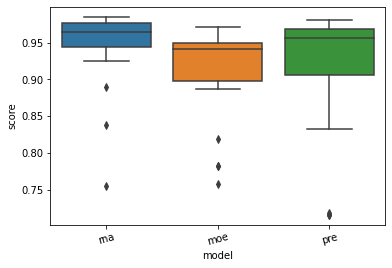

In [16]:
import seaborn as sb
plot = sb.boxplot(data=results_bcc[results_bcc['metric']=='R_squared'], y='score', x='model')
plot.set_xticklabels(plot.get_xticklabels(), rotation=15)

[Text(0, 0, 'rna'), Text(1, 0, 'moe'), Text(2, 0, 'pre')]

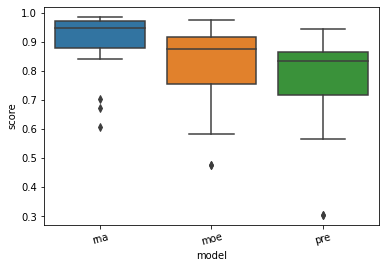

In [17]:
plot = sb.boxplot(data=results_bcc[results_bcc['metric']=='R_squared_top100'], y='score', x='model')
plot.set_xticklabels(plot.get_xticklabels(), rotation=15)

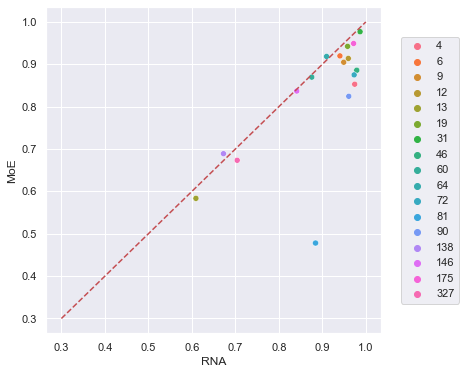

In [18]:
def do_regplot(df):
    sb.set(rc={'figure.figsize':(6, 6)})
    rna_values = df[df['model']=='rna']
    rna_values = rna_values.sort_values('clonotype')
    labels = [str(el) for el in rna_values['clonotype'].values]
    rna_values = rna_values['score'].values
    
    moe_values = df[df['model']=='moe']
    moe_values = moe_values.sort_values('clonotype')
    moe_values = moe_values['score'].values
    
    ax = sb.scatterplot(x=rna_values, y=moe_values, hue=labels)
    ax.plot([0.3, 1], [0.3, 1], 'r--')
    plt.legend(bbox_to_anchor=(1.25, 0.5), loc='right')
    ax.set_xlabel('RNA')
    ax.set_ylabel('MoE')
do_regplot(results_bcc[results_bcc['metric']=='R_squared_top100'])

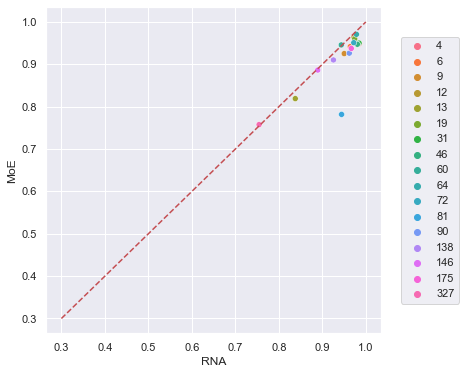

In [19]:
do_regplot(results_bcc[results_bcc['metric']=='R_squared'])